
<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Decision trees
- Cross-validation
- Random forests

<hr/>

<h1><font color="darkblue">Decision Tree</font></h1>

- Recursive partitioning of the training dataset

> At a given node with dataset $D$ we look for the
> best split 
> <br>
> <br>
> $\theta = $ (feature $j$, threshold $t$) 
> <br>
> <br>
> such that the 
> partitions $D_{\textrm{left}}(\theta)$ and $D_{\textrm{right}}(\theta)$ have minimal *impurity*
> <br>
> <br>
> $\displaystyle I(\theta) = \frac{n_{\textrm{left}}}{n}\, H\Big(D_{\textrm{left}}(\theta)\Big) + \frac{n_{\textrm{right}}}{n}\,H\Big(D_{\textrm{right}}(\theta)\Big)$

- Different impurity functions $H(\cdot)$

> E.g., Gini with $K$ classes in the partition $D$
> <br>
> <br>
>$\displaystyle H(D) = \sum_{i=1}^K p_i\, (1-p_i)$
> <br>
> <br>
> Or variance for regression


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2] # only first 2 features
c = iris.target
subset = c<2 # classes 0 and 1
X,c = X[subset,:], c[subset]

In [3]:
X.shape

(100, 2)

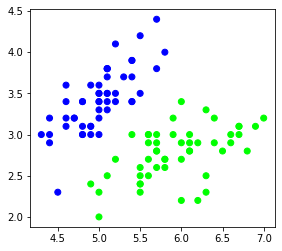

In [4]:
subplot(111,aspect='equal'); 
scatter(X[:,0],X[:,1],c=c,cmap=cm.brg);

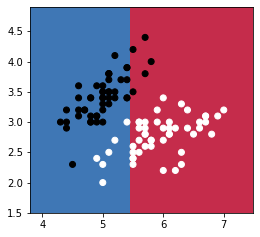

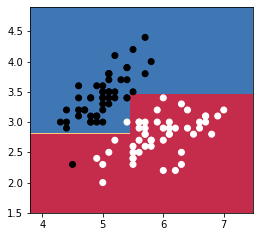

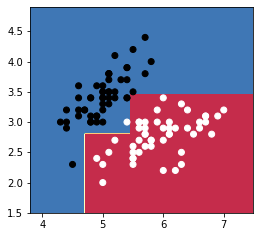

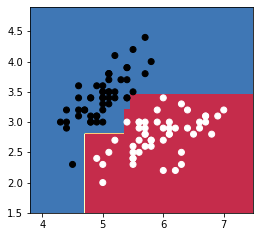

In [5]:
from sklearn import tree
# grid of points within the limits
h = 0.01
x,y = meshgrid(arange(X[:,0].min()-.5, X[:,0].max()+.5, h),
               arange(X[:,1].min()-.5, X[:,1].max()+.5, h))
grid = np.c_[x.ravel(),y.ravel()]

# decision-surfaces as fn of max depth
for depth in range(1,5):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    z = clf.fit(X,c).predict(grid).reshape(x.shape)
    figure(figsize=(4,4)); subplot(111,aspect='equal')
    contourf(x, y, z, cmap=cm.Spectral_r)
    scatter(X[:,0], X[:,1], c=c, cmap=cm.gray);

In [6]:
from sklearn.model_selection import cross_val_score

# quality as fn of max depth
for depth in range(1,5):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    s = cross_val_score(clf, X,c, cv=10) # apples to apples?
    print (depth, s.mean(), s.std(), s.min())

1 0.89 0.08306623862918074 0.8
2 0.97 0.045825756949558386 0.9
3 0.97 0.045825756949558386 0.9
4 0.97 0.045825756949558386 0.9


In [7]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10,shuffle=True,random_state=42) 

scores = dict() # store the cv score of each split
for train, test in k_fold.split(X):
    for depth in range(1,5):
        clf = tree.DecisionTreeClassifier(max_depth=depth)
        clf.fit(X[train],c[train])
        score = clf.score(X[test],c[test])
        if depth not in scores: scores[depth] = [] # empty 
        scores[depth].append(score) # list for this depth

for depth in scores:
    s = np.array(scores[depth])
    print (depth, s.mean(), s.std(), s.min())

1 0.89 0.09433981132056604 0.7
2 0.95 0.06708203932499368 0.8
3 0.95 0.06708203932499368 0.8
4 0.95 0.06708203932499368 0.8


<h1><font color="darkblue">Random Forest</font></h1>

### Random Tree

- Hard to pick the *best* in high dimensions (i.e., very expensive)

> Instead we pick a number of random directions to search<br/>
> and take the optimal split among those

- A randomized tree will not be optimal but much faster to build

### Forest of Random Trees

- Create multiple randomized trees to classify

> Combine the results, e.g., voting

- Check out Boostrap and Bagging

array([1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 1. , 1. ])

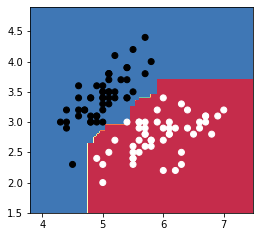

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=50,max_depth=2)
z = clf.fit(X,c).predict(grid).reshape(x.shape)

figure(figsize=(4,4)); subplot(111,aspect='equal')
contourf(x,y,z, cmap=cm.Spectral_r)
scatter(X[:,0],X[:,1], c=c, cmap=cm.gray);

cross_val_score(clf, X,c, cv=10)

### Assumptions and Limitations

- Axis parallel boundaries might be suboptimal

- But there is no need for a distance function

- And improved by random forest with many trees

also

- Improvements in the estimation error by random forest
cf. central limit theorem



### Feature Selection

- How frequently do we use a feature to split?

> It says something about how useful that feature is

In [9]:
clf.feature_importances_

array([0.51483808, 0.48516192])

### Divide and Conquer

- These methods are applicable to regression problems

> Minimize the variance of the left and right partitions
> <br>
> e.g., piecewise constant

- Useful concepts to consider to build complex methods



### Exercise

- What RF classifier gives the best result on the IRIS dataset?

> Vary the relevant parameters to find the best one!


In [10]:
# useful trick
[i*i for i in range(4)]

[0, 1, 4, 9]

In [11]:
# even conditionals
[(i, j, 4*i+j) for i in range(4) for j in range(4-i) if i*j>=2]

[(1, 2, 6), (2, 1, 9)]

In [12]:
# alias for short
RF = RandomForestClassifier

In [13]:
# labeled data
X = iris.data
c = iris.target

In [14]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42) 

# Create list of classifiers
clfs = [((n,d,f,c), RF(max_depth=d, n_estimators=n, max_features=f, criterion=c)) 
        for c in ['gini','entropy'] 
        for d in [2,3] 
        for n in [50,200] 
        for f in [2,3]]
print (len(clfs))

16


In [15]:
# Use k-fold Cv to find the best classifier

### Automation: Pipeline and GridSearchCV

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html <br/>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



### Unhomework

Go to http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html and modify the code to run all classifiers that we learned so far